# Student Admission Prediction

This research is based on an Admission Predication dataset [1]. The research involves Exploratory Data Analysis(EDA), cleaning, model training, testing and validation.

**Business Problem:** Train a Machine Learning model based on historical student data to predict the chances of admission for a set of students.

In [1]:
#Import all libraries
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Import the dataset
df = pd.read_csv("Admission_Predict_Ver1.csv")

#Verify the first five rows for the sanity check
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
#Verify the shape of data

print ("\033[1mShape of dataset:")
df.shape

Shape of dataset:


(500, 9)

In [4]:
#Verify the number of features, samples and type
df.info()

#Verify if there are any null values in the data
print ("\n\n\033[1mDataset has any null values:")
df.isnull().values.any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


Dataset has any null values:


False

In [5]:
#Verify the statistics of data like mean, std etc.
print ("\n\n\033[1mDataset statistics:")
df.describe()



Dataset statistics:


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000



Heat Map of full data set:


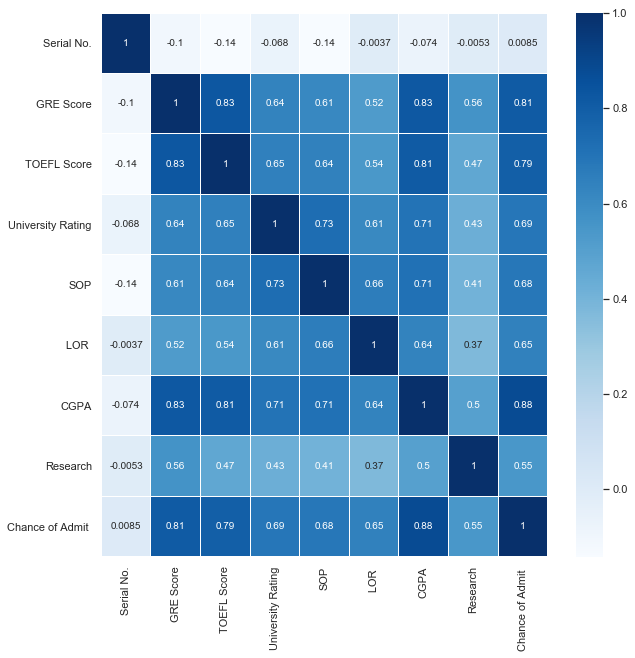

In [6]:
#Plot the Heat Map to see the relation between all the features and Chance of Admit  
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), linewidths=0.08, annot=True, cmap='Blues')
print("\n\033[1mHeat Map of full data set:")

It is visible from the above heatmap that the three features that have high impact on the Chance of Admit are:


1.  CGPA - 0.88
2.  GRE - 0.81
3.  TOEFL - 0.79



**Observation on Column Labels:**
Analyzing the data it was noticed the two columns in the dataset have extra trailing space. The two columns are: LOR and Chance of Admit. These columns should be renamed for easier reference.

In [7]:
df.rename(columns = {'Chance of Admit ':'Chance of Admit', 'LOR ':'LOR'}, inplace=True)

<Figure size 1440x432 with 0 Axes>

Text(0.5, 1.0, 'CGPA Distribution of Applicants')

Text(0.5, 1.0, 'CGPA v/s Chance of Admit')

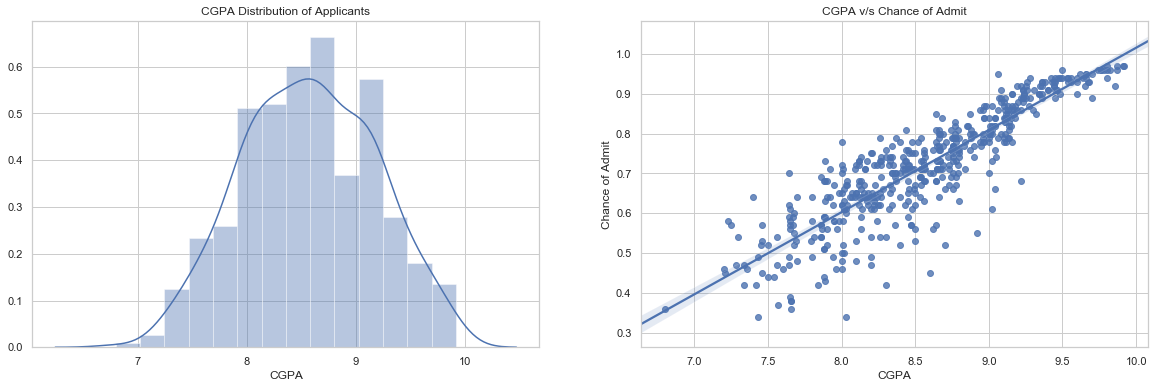

In [8]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(df['CGPA'])
plt.title('CGPA Distribution of Applicants')

plt.subplot(1,2,2)
sns.regplot(df['CGPA'], df['Chance of Admit'])
plt.title('CGPA v/s Chance of Admit')

**Observation on the above plots of CGPA:**


*   It can be noticed that most of the applicants have a CGPA between than 8.2 to 9.2
*   It can also be observed that if an applicant has a CGPA higher than 8.0 than they have a higher Chance of Admit
*   Chance of Admit has a high dependence on the CGPA of a student



<Figure size 1440x432 with 0 Axes>

Text(0.5, 1.0, 'GRE Distribution of Applicants')

Text(0.5, 1.0, 'GRE Scores v/s Chance of Admit')

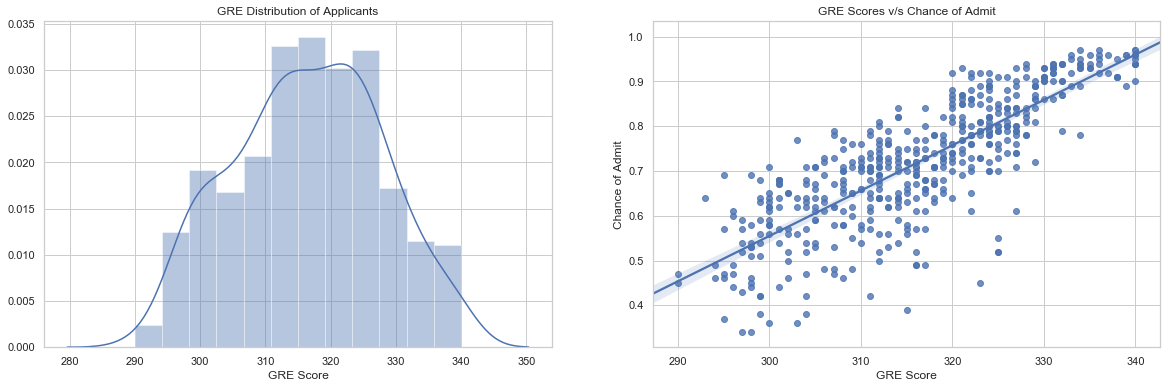

In [9]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(df['GRE Score'])
plt.title('GRE Distribution of Applicants')

plt.subplot(1,2,2)
sns.regplot(df['GRE Score'], df['Chance of Admit'])
plt.title('GRE Scores v/s Chance of Admit')

**Observation on the above plots of GRE:**

*   It can be noticed that most of the applicants have a GRE score between than 310 to 328
*   Based on the high density towards GRE score, it can be considered that Chance of Admit is dependent on GRE score as well. So, GRE score higher than 310 can increase the Chance of Admit.
*   The co-relation pf GRE with Chance of Admit is not as strong as CGPA with Chance of Admit



<BarContainer object of 3 artists>

Text(0.5, 1.0, 'TOEFL Score Distribution of Applicants')

Text(0.5, 0, 'Level')

Text(0, 0.5, 'TOEFL Score')

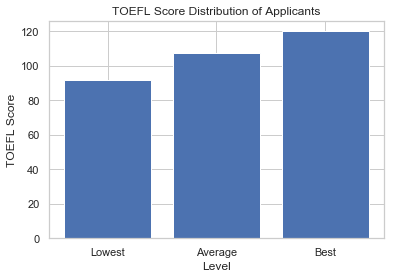

<Figure size 1440x432 with 0 Axes>

Text(0.5, 1.0, 'TOEFL Score vs Chance of Admit')

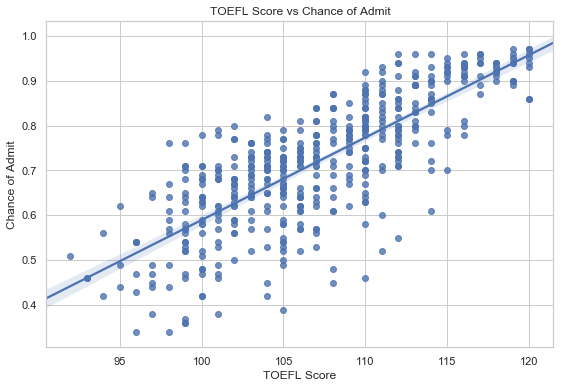

In [10]:
y = np.array([df["TOEFL Score"].min(),df["TOEFL Score"].mean(),df["TOEFL Score"].max()])
x = ["Lowest","Average","Best"]
plt.bar(x,y)
plt.title("TOEFL Score Distribution of Applicants")
plt.xlabel("Level")
plt.ylabel("TOEFL Score")
plt.show()

plt.figure(figsize=(20,6))
plt.subplot(1,2,2)
sns.regplot(df['TOEFL Score'], df['Chance of Admit'])
plt.title('TOEFL Score vs Chance of Admit')

**Observation on the above plots of TOEFL Score:**

*   It can be noticed that distibution of applicants is lowest around 90, average around 105 and best at 120
*   Based on the high density of TOEFL score after 105, it can be considered that Chance of Admit is dependent on TOEFL score as well. 



In [11]:
# Drop Serial Number column as it has an index for the students and has no relevance in the prediction.
# However, take the backup of the values
serialNo = df["Serial No."].values
df.drop(["Serial No."],axis=1,inplace = True)
print("\n\033[1m'Serial No.' column dropped.")



'Serial No.' column dropped.


In [12]:
targets = df['Chance of Admit']
features = df.drop(columns = {'Chance of Admit'})

#Separating Train and Test data into a ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

pd.options.mode.chained_assignment = None

#Find the mean of the Chance of Admit. This can also be referred in the table with the title: "Dataset statistics"
meanAdmitChance = df['Chance of Admit'].mean()

y_train_binFormat = (y_train > meanAdmitChance).astype(int)
y_test_binFormat = (y_test > meanAdmitChance).astype(int)

**To convert the Chance of Admit to binary values, it is considered that:**

*   If a candidate's Chance of Admit is greater than the mean, the candidate will receive label 1 i.e. accepted
*  If a candidate's Chance of Admit is less than or equal to mean, the candidate will receive the label 0 i.e. rejected

In [13]:
#Logistic Regression
L_regression = LogisticRegression()
x = L_regression.fit(X_train, y_train_binFormat)
y_predict = L_regression.predict(X_test)
L_regression_score = (L_regression.score(X_test, y_test_binFormat))*100
print("\n\n\033[1mLogistic Regression Score: ",L_regression_score)



Logistic Regression Score:  85.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [14]:
#Decision Tree Classification
D_tree = DecisionTreeClassifier(random_state=0, max_depth=6)
x = D_tree.fit(X_train, y_train_binFormat)
y_predict = D_tree.predict(X_test)
D_tree_score = (D_tree.score(X_test, y_test_binFormat))*100
print("\n\n\033[1mDecision Tree Classification Score: ",D_tree_score)



Decision Tree Classification Score:  87.0


In [15]:
#Random Forest
forest = RandomForestClassifier(n_estimators=100,max_depth=6,random_state=1)
x = forest.fit(X_train, y_train_binFormat)
y_predict = forest.predict(X_test)
forest_score = (forest.score(X_test, y_test_binFormat))*100
print("\n\n\033[1mRandom Forest Score: ",forest_score)



Random Forest Score:  92.0


Text(0.5, 1.0, 'Accuracy v/s value of k in KNN')

Text(0.5, 0, 'k')

Text(0, 0.5, 'accuracy')

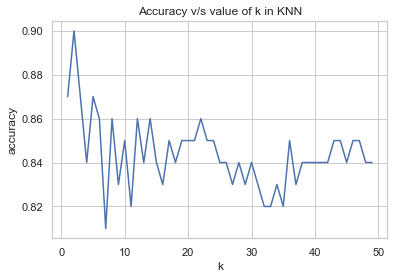


KNN score with 2 nearest neighbours: 90.0


In [16]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
scores = []
for each in range(1,50):
    knn_n = KNeighborsClassifier(n_neighbors = each)
    x = knn_n.fit(X_train,y_train_binFormat)
    scores.append(knn_n.score(X_test,y_test_binFormat))
    
plt.plot(range(1,50),scores)
plt.title("Accuracy v/s value of k in KNN")
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()

knn = KNeighborsClassifier(n_neighbors = 2)
x = knn.fit(X_train,y_train_binFormat)
knn_score = (knn.score(X_test, y_test_binFormat))*100
print("\n\033[1mKNN score with 2 nearest neighbours:",knn_score)

# Accuracy of various classifiers

<BarContainer object of 4 artists>

Text(0.5, 1.0, 'Comparison of Classification Algorithms')

Text(0.5, 0, 'Models')

Text(0, 0.5, 'Score')

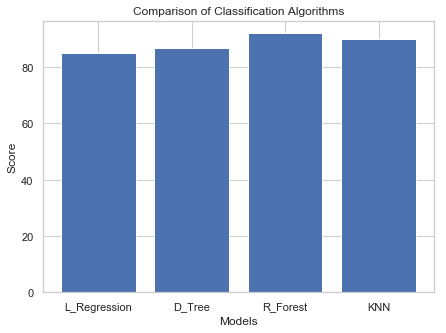

In [17]:
#Code to visualize the accuracy of the above classifiers
y = np.array([L_regression_score, D_tree_score, forest_score, knn_score])
x = ["L_Regression","D_Tree","R_Forest","KNN"]

fig, ax = plt.subplots(figsize=(7,5))
plt.bar(x,y)
plt.title("Comparison of Classification Algorithms")
plt.xlabel("Models")
plt.ylabel("Score")
plt.show()

# Verification of Model and implementation of Cross-Validation

In [19]:
#Verifying the models on three selected features and cross-validation

FeatDF = pd.DataFrame()
FeatDF["CGPA"] = df["CGPA"]
FeatDF["GRE Score"] = df["GRE Score"]
FeatDF["TOEFL Score"] = df["TOEFL Score"]
FeatDF["Chance of Admit"] = df["Chance of Admit"]

targets = FeatDF['Chance of Admit']
features = FeatDF.drop(columns = {'Chance of Admit'}, axis=1)

#Separating Train and Test data into a ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

#Find the mean of the Chance of Admit. This can also be referred in the table with the title: "Dataset statistics"
meanAdmitChance = df['Chance of Admit'].mean()

y_train_binFormat = (y_train > meanAdmitChance).astype(int)
y_test_binFormat = (y_test > meanAdmitChance).astype(int)

#Train KNN on new data for testing in next step
knn = KNeighborsClassifier(n_neighbors = 6)
x = knn.fit(X_train,y_train_binFormat)

num_trees = 200
max_features = 3
max_depth=6
random_state=1
n_neighbors = 6

models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('K Nearest Neighbour', KNeighborsClassifier(n_neighbors = n_neighbors)))
models.append(('Decision Tree', DecisionTreeClassifier(max_depth = max_depth, random_state = random_state)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=num_trees, max_features=max_features, max_depth = max_depth, random_state = random_state)))
#Fit Models and Evaulate
results = []
names = []
scoring = 'accuracy'

print("Different model's accuracy based on three features of GRE, TOEFL, and CGPA after cross-validation:")

#Cross Validation
for name, model in models:
   = KFold(n_splits = 10, random_state=7)
  cv_results = cross_val_score(model, X_train, y_train_binFormat, cv=kfold, scoring = scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name,cv_results.mean()*100, cv_results.std())
  print(msg)



Different model's accuracy based on three features of GRE, TOEFL, and CGPA after cross-validation:


NameError: name 'KFold' is not defined

# Validate the model with testing data

In [26]:
#Test (CGPA, GRE, TOEFL)
new_data = [[-1,-1,-1], [0,340,0] , [9,320,120], [6,320,120] ]

new_array = np.asarray(new_data)

#Output Labels
labels=["reject","admit"]

prediction = knn.predict(new_array)

#Get number of test cases used
no_of_test_cases, cols = new_array.shape

for i in range(no_of_test_cases):
  print("Status of Student with the following scores CGPA = {}, GRE = {}, TOEFL = {} will be {}".format(new_data[i][0],new_data[i][1],new_data[i][2], labels[int(prediction[i])]))

Status of Student with the following scores CGPA = -1, GRE = -1, TOEFL = -1 will be reject
Status of Student with the following scores CGPA = 0, GRE = 340, TOEFL = 0 will be reject
Status of Student with the following scores CGPA = 9, GRE = 320, TOEFL = 120 will be admit
Status of Student with the following scores CGPA = 6, GRE = 320, TOEFL = 120 will be admit


References:



[1] "A Comparison of Regression Models for Prediction of Graduate Admissions - IEEE Conference Publication", Doi.org, 2019. [Online]. Available: https://doi.org/10.1109/ICCIDS.2019.8862140. [Accessed: 12- Dec- 2018].

